<h1>Soal 1: Pemahaman</h1>

1. Sebutkan apa saja yang termasuk preprocessing data!
2. Jelaskan beberapa cara imputing missing value!
3. Kapan kita perlu melakukan feature centering dan scaling?
4. Bagaimana Data Science Workflow?

Jawab:

1. Feature engineering (mengubah/memanipluasi data yg tadinya gabisa diproses jd bisa diproses oleh library sklearn) yg terdiri atas Encooding caterogical data (utk mengubah tipe data kategori menjd numerik), inputing missing value, centering dan scaling.

2. 
*   Drop missing value
*   fill with mean/median
*   fill with modus
*   fill with bfill atau ffill
*   KNN

3. ketika ada pertemuan jarak antar data point sehingga harus dirubah distribusinya

4.   resource data -> processing -> modelling -> deploy -> monitor

---

<h1>Soal 2: Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data [titanic.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data [titanic_test.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit

![alt text](https://drive.google.com/uc?id=1SyflO2YeuCdYhxwPF6CAtMeaNN1qTaFx)

In [ ]:
# Code here
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/My Drive/PEKAN 4/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
#melihat survival rate by sex n class
df.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
#cek total missing value dari setiap kolom
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#melihat tipe data
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Menghapus kolom Passenger ID, Name, Ticket, and Cabin 
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
#remove the rows with missing value
df = df.dropna(subset=['Embarked', 'Age'])

In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
df.shape

(712, 8)

In [ ]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encoding kolom sex
df.iloc[:, 2] = labelencoder.fit_transform(df.iloc[:, 2].values)

#Encoding kolom embarked
df.iloc[:, 7] = labelencoder.fit_transform(df.iloc[:, 7].values)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

[1 0]
[2 0 1]


In [ ]:
#Split data menjadi data X dan Y
X = df.iloc[:, 1:8].values
Y = df.iloc[:, 0].values

In [ ]:
#Membagi dataset menjadi data test dan data training
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pl

def evalModel(y, pred, proba):
    print ("Accuracy  : %.5f" % accuracy_score(y, pred))
    print ("Recall    : %.5f" % recall_score(y, pred))
    print ("Precision : %.5f" % precision_score(y, pred))
    print ("F1 score  : %.5f" % f1_score(y, pred))
    print ("Log_loss  : %.5f" % log_loss(y, proba))
    print ("AUC score : %.5f" % roc_auc_score(y, proba))
    
def plotAUC(y, proba):
    fpr,tpr,thresholds = roc_curve(y, proba)
    pl.figure()
    pl.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = {0})'.format(roc_auc_score(y, proba)))
    pl.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    pl.xlim([0.0, 1.0])
    pl.ylim([0.0, 1.05])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title('Receiver operating characteristic graph')
    pl.legend(loc="lower right")
    pl.show()
    
def classificationTable(y, proba):
    cuts=[]
    acc=[]
    sens=[]
    spec=[]
    tp_l=[]
    tn_l=[]
    fp_l=[]
    fn_l=[]

    for cutoff in [0.01*p for p in range(1,100)]:
        lg1 = [1 if proba > cutoff else 0 for proba in proba]
        tn, fp, fn, tp = confusion_matrix(y, lg1).ravel()
        cuts.append(cutoff)
        acc.append((tp+tn)/(tp+fp+fn+tn))
        sens.append(tp/(tp+fn))
        spec.append(tn/(tn+fp))
        tp_l.append(tp)
        tn_l.append(tn)
        fp_l.append(fp)
        fn_l.append(fn)
    d={'Cutoff':cuts,'Accuracy':acc,'Sensitivity':sens,'Spesificity':spec,'tp': tp_l,'tn': tn_l, 'fp': fp_l, 'fn': fn_l }
    result=pd.DataFrame(data=d)
    result=result[['Cutoff','Accuracy','Sensitivity', 'Spesificity', 'tp', 'tn', 'fp', 'fn']]
    
    with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
        print(result)
        
def modelEvaluationStat(x, y, clf):
    pred = clf.predict(x)
    proba = clf.predict_proba(x)[:,1]
    evalModel(y, pred, proba)
    classificationTable(y, proba)
    plotAUC(y, proba)

**RANDOM FOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=0)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Evaluasi model terhadap data training**

Accuracy  : 0.97540
Recall    : 0.96035
Precision : 0.97758
F1 score  : 0.96889
Log_loss  : 0.12020
AUC score : 0.99771
    Cutoff  Accuracy  Sensitivity  Spesificity   tp   tn   fp   fn
0     0.01  0.752197     1.000000     0.587719  227  201  141    0
1     0.02  0.752197     1.000000     0.587719  227  201  141    0
2     0.03  0.752197     1.000000     0.587719  227  201  141    0
3     0.04  0.753954     1.000000     0.590643  227  202  140    0
4     0.05  0.760984     1.000000     0.602339  227  206  136    0
5     0.06  0.760984     1.000000     0.602339  227  206  136    0
6     0.07  0.760984     1.000000     0.602339  227  206  136    0
7     0.08  0.760984     1.000000     0.602339  227  206  136    0
8     0.09  0.760984     1.000000     0.602339  227  206  136    0
9     0.10  0.861160     1.000000     0.769006  227  263   79    0
10    0.11  0.861160     1.000000     0.769006  227  263   79    0
11    0.12  0.861160     1.000000     0.769006  227  263   79    0
12    0.1

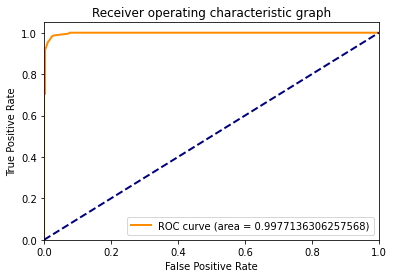

In [ ]:
modelEvaluationStat(X_train, Y_train, forest)

**Evaluasi model terhadap data test**

Accuracy  : 0.80420
Recall    : 0.78689
Precision : 0.76190
F1 score  : 0.77419
Log_loss  : 1.30645
AUC score : 0.87335
    Cutoff  Accuracy  Sensitivity  Spesificity  tp  tn  fp  fn
0     0.01  0.594406     0.950820     0.329268  58  27  55   3
1     0.02  0.594406     0.950820     0.329268  58  27  55   3
2     0.03  0.594406     0.950820     0.329268  58  27  55   3
3     0.04  0.601399     0.950820     0.341463  58  28  54   3
4     0.05  0.615385     0.950820     0.365854  58  30  52   3
5     0.06  0.615385     0.950820     0.365854  58  30  52   3
6     0.07  0.615385     0.950820     0.365854  58  30  52   3
7     0.08  0.615385     0.950820     0.365854  58  30  52   3
8     0.09  0.615385     0.950820     0.365854  58  30  52   3
9     0.10  0.685315     0.950820     0.487805  58  40  42   3
10    0.11  0.685315     0.950820     0.487805  58  40  42   3
11    0.12  0.685315     0.950820     0.487805  58  40  42   3
12    0.13  0.685315     0.950820     0.487805  58  40  42   

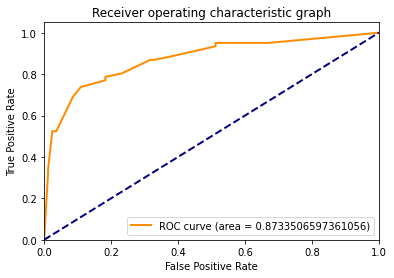

In [ ]:
modelEvaluationStat(X_test, Y_test, forest)

**Hyperparameter default**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest2 = RandomForestClassifier()
forest2.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy  : 0.99297
Recall    : 0.98678
Precision : 0.99556
F1 score  : 0.99115
Log_loss  : 0.11472
AUC score : 0.99979
    Cutoff  Accuracy  Sensitivity  Spesificity   tp   tn   fp   fn
0     0.01  0.586995     1.000000     0.312865  227  107  235    0
1     0.02  0.620387     1.000000     0.368421  227  126  216    0
2     0.03  0.657293     1.000000     0.429825  227  147  195    0
3     0.04  0.697715     1.000000     0.497076  227  170  172    0
4     0.05  0.724077     1.000000     0.540936  227  185  157    0
5     0.06  0.757469     1.000000     0.596491  227  204  138    0
6     0.07  0.782074     1.000000     0.637427  227  218  124    0
7     0.08  0.794376     1.000000     0.657895  227  225  117    0
8     0.09  0.811951     1.000000     0.687135  227  235  107    0
9     0.10  0.826011     1.000000     0.710526  227  243   99    0
10    0.11  0.840070     1.000000     0.733918  227  251   91    0
11    0.12  0.855888     1.000000     0.760234  227  260   82    0
12    0.1

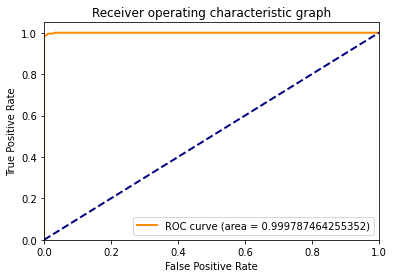

In [ ]:
modelEvaluationStat(X_train, Y_train, forest2)

**DECISION TREE CLASSIFIER MODEL**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy  : 0.99297
Recall    : 0.98238
Precision : 1.00000
F1 score  : 0.99111
Log_loss  : 0.01067
AUC score : 0.99989
    Cutoff  Accuracy  Sensitivity  Spesificity   tp   tn  fp  fn
0     0.01  0.991213     1.000000     0.985380  227  337   5   0
1     0.02  0.991213     1.000000     0.985380  227  337   5   0
2     0.03  0.991213     1.000000     0.985380  227  337   5   0
3     0.04  0.991213     1.000000     0.985380  227  337   5   0
4     0.05  0.991213     1.000000     0.985380  227  337   5   0
5     0.06  0.991213     1.000000     0.985380  227  337   5   0
6     0.07  0.991213     1.000000     0.985380  227  337   5   0
7     0.08  0.991213     1.000000     0.985380  227  337   5   0
8     0.09  0.991213     1.000000     0.985380  227  337   5   0
9     0.10  0.991213     1.000000     0.985380  227  337   5   0
10    0.11  0.991213     1.000000     0.985380  227  337   5   0
11    0.12  0.991213     1.000000     0.985380  227  337   5   0
12    0.13  0.991213     1.000000  

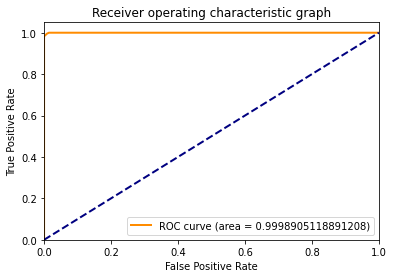

In [ ]:
modelEvaluationStat(X_train, Y_train, tree)

Accuracy  : 0.76923
Recall    : 0.80328
Precision : 0.70000
F1 score  : 0.74809
Log_loss  : 7.50492
AUC score : 0.78449
    Cutoff  Accuracy  Sensitivity  Spesificity  tp  tn  fp  fn
0     0.01  0.776224     0.836066     0.731707  51  60  22  10
1     0.02  0.776224     0.836066     0.731707  51  60  22  10
2     0.03  0.776224     0.836066     0.731707  51  60  22  10
3     0.04  0.776224     0.836066     0.731707  51  60  22  10
4     0.05  0.776224     0.836066     0.731707  51  60  22  10
5     0.06  0.776224     0.836066     0.731707  51  60  22  10
6     0.07  0.776224     0.836066     0.731707  51  60  22  10
7     0.08  0.776224     0.836066     0.731707  51  60  22  10
8     0.09  0.776224     0.836066     0.731707  51  60  22  10
9     0.10  0.776224     0.836066     0.731707  51  60  22  10
10    0.11  0.776224     0.836066     0.731707  51  60  22  10
11    0.12  0.776224     0.836066     0.731707  51  60  22  10
12    0.13  0.776224     0.836066     0.731707  51  60  22  1

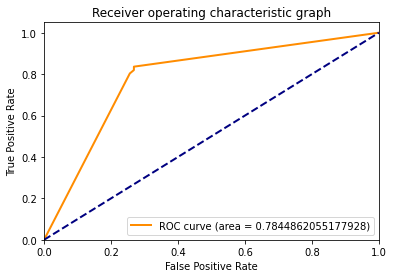

In [ ]:
modelEvaluationStat(X_test, Y_test, tree)

In [ ]:
#print random forest prediction
pred = forest.predict(X_test)
print(pred)

print()

#print actual values
print(Y_test)

[1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [ ]:
#my survival
my_survival = [[3, 0, 22, 0, 0, 0, 1]]


#scaling survival
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scale = sc.fit_transform(my_survival)

#prediksi my survival dengan model random forest
pred = forest.predict(my_survival_scale)
print(pred)

if pred == 0:
  print('Oh, no, u didnt survived')
else:
  print('Yay! u survived')


[1]
Yay! u survived
